In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from plotUtilities import asManyPlots

In [ ]:
filename1 = 'temp_profile_mej0.05_blue_photons.txt'
filename2 = 'temp_profile_mej0.05.txt'
Time = np.genfromtxt(filename2, dtype ='float', usecols =(0))
#Temp_lr = list(np.genfromtxt(filename, dtype='float', usecols=(1)))
#Temp_lf = list(np.genfromtxt(filename, dtype='float', usecols=(2)))
#vphot_lr = np.genfromtxt(filename, dtype='float', usecols=(3))
#vphot_lf = np.genfromtxt(filename, dtype='float', usecols=(4))
Temp = list(np.genfromtxt(filename2, dtype='float', usecols=(1)))
dens = list(np.genfromtxt(filename2, dtype='float', usecols=(2)))

Time = Time * 1/(24*3600)
radi = []
for d in dens:
    radi.append(d**(-1/3))
#vphot_lf = vphot_lf * 1/2.99792458e10
#vphot_lr = vphot_lr * 1/2.99792458e10

T0    = 5000
alpha = -0.4
t0    = 1.5 # in day 

In [ ]:
def temperature_code(Time):
    temp =[]
    for t in Time: 
        T = T0*(t/t0)**alpha
        temp.append(T)
    return temp

# Draw Temp profile for a given R

In [ ]:
Time      = list(Time)
density   = 5e-14
time_axis = list(np.unique(Time))

In [ ]:
temp_axis = []
index     = 0


for t in time_axis:
    epsilon     = 10**30
    while (t == Time[index]) and (index< (len(Time)-1)):
        if abs(dens[index]-density)<epsilon:
            epsilon = abs(dens[index]-density)
            temperature = Temp[index]
        index+=1
    #print(temperature, index)
    temp_axis.append(temperature)


In [ ]:
temp_axis.remove(temp_axis[0])
time_axis.remove(time_axis[0])

In [ ]:
Temp_para = temperature_code(time_axis)
print(max(temp_axis))

In [ ]:
ax, lw = asManyPlots(111, [time_axis, time_axis], [Temp_para, temp_axis], linestyle = ['-', '-'], plotFlag=[True, True], color =['darkseagreen', 'firebrick', 'steelblue'], 
                     markerSize = [0, 7], marker=[None, 'x'], linewidth = 2, 
                     xlabel='Time since merger (in days)', ylabel='Temperature (in K)', textsize = 14, tickSize=12, 
                     showLegend=True, label= ['Temperature from Kasliwal+ 2017', 'Temperature without black body assumptions'], 
                     legendTextSize =10)
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis_set_minor_locator(MultopleLocator())
#plt.savefig('temperature_profile_blue_photons.pdf', bbox_inches='tight')

# Draw Temperature Profile for a given time

In [ ]:
2**(1/4) * 6852.07

In [ ]:
dens_axis = []
temp_axis = []
t = 108000/(24*3600)
for i in range(len(Time)):
    if Time[i] == t:
        dens_axis.append(dens[i])
        temp_axis.append(Temp[i])



In [ ]:
t

In [ ]:
ax, lw = asManyPlots(111, [temp_axis], [dens_axis], linestyle = ['None'], plotFlag=[True], marker ='+',
                     markerSize = [7], linewidth = 2, 
                     xlabel='Temperature', ylabel='Density', textsize = 14, tickSize=12) 
                     #showLegend=True, label= ['vphot for the lanthanide rich'])
                                              
                     
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#plt.savefig('vphot_blue_photons.pdf', bbox_inches='tight')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from plotUtilities import asManyPlots
c     = 2.99792458*10**(10)
sigma = 5.6704*10**(-5) 
Day     = 86400
filename = 'temp_profile_mej0.05.txt'
t_0 = 1*Day

R       = 0.3*c*1*Day
nb_cell = 100
step    = 2*R/(nb_cell)

radius = np.arange(0.5, R, step) 
time   = np.arange(0.25, 15, 0.5) * Day
dens   = np.zeros((len(radius),len(time))) 


Em     = np.unique((np.genfromtxt(filename, dtype ='float', usecols =(3))))[::-1]

radius1 = 0.3*c *time
dens1   = []

T0    = 5000
alpha = -0.4
t0    = 1.5 *Day# in day 

def temperature_code(Time):
    temp =[]
    for t in Time: 
        T = T0*(t/t0)**alpha
        temp.append(T)
    return temp


        
for i in range(len(radius1)):
    rho = (radius1[i])**(-3) * 10**30
    dens1.append(rho*(t_0/time[i])**3)

temp_para = temperature_code(time)

def temperature(Em, dens):
    u = Em * dens 
    temp = (c*u/(4*sigma))**(0.25)
    return temp

Temp1 = temperature(Em, dens[1])
Temp2 = temperature(Em, dens[len(radius)-1])

Temp_01 = temperature(Em, dens1)


time = time *1/Day
ax, lw = asManyPlots(111, [time, time, time, time], [temp_para, Temp1, Temp2, Temp_01], plotFlag=[True,True, True,True], color =['crimson', 'bisque', 'lightsteelblue', 'rebeccapurple'], 
                     markerSize = [0, 0, 0, 0], linewidth = 2, linestyle =['-', '-', '-', '-'],
                     xlabel='Time since merger (in days)', ylabel='Temperature (in K)', textsize = 14, tickSize=12, 
                     showLegend=True, label= ['Temperature from Kasliwal+ 2017', 'Temperature at the center', 'Temperature at the outer region', 'Temperature at 0.1c'], 
                     legendTextSize =10, ylim=[50, 8000])
plt.fill_between(time, Temp1, Temp2, color = 'rosybrown', alpha = 0.3)
#plt.savefig('vphot_blue_photons.pdf', bbox_inches='tight')

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from plotUtilities import asManyPlots

filename = 'dens_r_relation.txt'
density = np.genfromtxt(filename, dtype ='float', usecols =(0))
radius  = np.genfromtxt(filename, dtype ='float', usecols =(1))

radius = radius**(-3)

np.polyfit(radius, density, 1)

a = np.polyfit(radius, density, 1)[0]
b = np.polyfit(radius, density, 1)[1]

curve_fit = a*radius

In [26]:
curve_fit

array([7.21711363e-16, 7.36385271e-16, 7.51253949e-16, ...,
       7.51253949e-16, 7.36385271e-16, 7.21711363e-16])

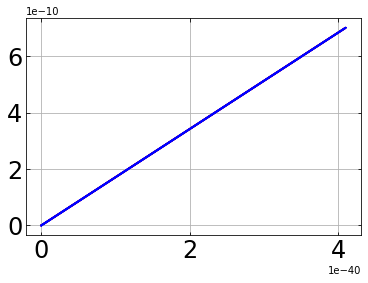

In [29]:
ax, lw = asManyPlots(111, [radius, radius], [density, curve_fit], plotFlag =[True, True], linestyle =['-', '-'], marker = [None, None], markerSize=[0,0], color=['red','blue'],linewidth = 2)

In [23]:
a

1.707325420302365e+30

In [16]:
density

array([7.21705e-46, 7.36382e-46, 7.51248e-46, ..., 7.51248e-46,
       7.36382e-46, 7.21705e-46])

In [10]:
radius[1000]

5.12996619339584e-46